### 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다
#### (1) 필요한 모듈 import 하기

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix
import pandas as pd

#### (2) 데이터 준비

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

#### (3) 데이터 이해하기
+ Feature Data 지정하기
+ Label Data 지정하기
+ Target Names 출력해 보기
+ 데이터 Describe 해 보기

In [3]:
digits_data = digits.data
digits_label = digits.target
print(digits_data.shape)
print(digits_label.shape)

(1797, 64)
(1797,)


In [4]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [5]:
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


#### (4) train, test 데이터 분리

In [6]:
train_input, test_input, train_target, test_target = train_test_split(digits.data, digits.target, test_size=0.2)
print("train_input 갯수 :", len(train_input), "test_input 갯수 :", len(test_input))

train_input 갯수 : 1437 test_input 갯수 : 360


#### (5) 다양한 모델로 학습시켜보기
+ Decision Tree 사용해 보기
+ Random Forest 사용해 보기
+ SVM 사용해 보기
+ SGD Classifier 사용해 보기
+ Logistic Regression 사용해 보기

In [7]:
# 5가지의 모델을 한번에 좀더쉽게 사용하기위한 함수 작성
def model_fit_pred(model,X_train, y_train,X_test,y_test) :
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [8]:
# Decision Tree 사용해 보기
decision_tree = DecisionTreeClassifier(random_state=32) # decisionTree 분류기 객체 생성
decision_tree_y_pred=model_fit_pred(decision_tree,train_input,train_target,test_input,test_target)

# Random Forest 사용해 보기
random_forest = RandomForestClassifier(random_state=32) # RandomForest 분류기 객체 생성
random_forest_y_pred=model_fit_pred(random_forest,train_input,train_target,test_input,test_target)

# SVM 사용해 보기
svm_model = svm.SVC(random_state=32) # SVM 모델 객체 생성
svm_model_y_pred=model_fit_pred(svm_model,train_input,train_target,test_input,test_target)

# SGD Classifier 사용해 보기
sgd_model = SGDClassifier(random_state=32) # SGD Classifier 모델 객체 생성
sgd_model_y_pred=model_fit_pred(sgd_model,train_input,train_target,test_input,test_target)

# Logistic Regression 사용해 보기
logistic_model = LogisticRegression(max_iter=3000,random_state=32) # Logistic Regression 모델 객체 생성 # max_iter로 훈련 제한을 걸어줘야함.
logistic_model_y_pred=model_fit_pred(logistic_model,train_input,train_target,test_input,test_target)

#### (6) 모델을 평가해 보기

In [9]:
# 전체 평가지표에대한 점수를 뽑아보기위한 함수 작성
def score_print(model_type,y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro',zero_division=1)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f'{model_type}_accuracy : {accuracy:.5f}')
    print(f'{model_type}_precision : {precision:.5f}')
    print(f'{model_type}_recall : {recall:.5f}')
    print(f'{model_type}_f1 : {f1:.5f}')
    print('-----------------------------------')

In [10]:
score_print('decision_tree',test_target,decision_tree_y_pred)
score_print('random_forest',test_target,random_forest_y_pred)
score_print('svm_model',test_target,svm_model_y_pred)
score_print('sgd_model',test_target,sgd_model_y_pred)
score_print('logistic_model',test_target,logistic_model_y_pred)

decision_tree_accuracy : 0.86389
decision_tree_precision : 0.86182
decision_tree_recall : 0.85946
decision_tree_f1 : 0.85743
-----------------------------------
random_forest_accuracy : 0.97222
random_forest_precision : 0.97534
random_forest_recall : 0.97388
random_forest_f1 : 0.97437
-----------------------------------
svm_model_accuracy : 0.98611
svm_model_precision : 0.98814
svm_model_recall : 0.98617
svm_model_f1 : 0.98701
-----------------------------------
sgd_model_accuracy : 0.93333
sgd_model_precision : 0.93618
sgd_model_recall : 0.93428
sgd_model_f1 : 0.93286
-----------------------------------
logistic_model_accuracy : 0.95833
logistic_model_precision : 0.96316
logistic_model_recall : 0.96012
logistic_model_f1 : 0.96136
-----------------------------------


#### 모델의 성능을 평가하는 지표선정 및, 선정 이유

---
##### 손 글씨 모델에서는 0의 존재 때문에 정확도는 믿을수 없다. 해서, 정밀도(Precision)와 재현율(Recall)의 종합점수인 f1-score를 사용해서 평가하는것이 좋다고 생각됨

### 프로젝트 (2) load_wine : 와인을 분류해 봅시다

#### (1,2) 필요한 모듈 import 및 데이터 준비

In [11]:
from sklearn.datasets import load_wine

wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

#### (3) 데이터 이해하기
+ Feature Data 지정하기
+ Label Data 지정하기
+ Target Names 출력해 보기
+ 데이터 Describe 해 보기

In [12]:
wine_data = wine.data
wine_label = wine.target
print(wine_data.shape)
print(wine_label.shape)

(178, 13)
(178,)


In [13]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [14]:
digits_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
digits_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### (4) train, test 데이터 분리

In [15]:
train_input, test_input, train_target, test_target = train_test_split(wine.data, wine.target,
                                                                      test_size=0.15)  # 데이터 갯수에 따른 비율 조정
print("train_input 갯수 :", len(train_input), "test_input 갯수 :", len(test_input))

train_input 갯수 : 151 test_input 갯수 : 27


#### (5) 다양한 모델로 학습시켜보기
+ Decision Tree 사용해 보기
+ Random Forest 사용해 보기
+ SVM 사용해 보기
+ SGD Classifier 사용해 보기
+ Logistic Regression 사용해 보기

In [16]:
# Decision Tree 사용해 보기
decision_tree = DecisionTreeClassifier(random_state=32) # decisionTree 분류기 객체 생성
decision_tree_y_pred=model_fit_pred(decision_tree,train_input,train_target,test_input,test_target)

# Random Forest 사용해 보기
random_forest = RandomForestClassifier(random_state=32) # RandomForest 분류기 객체 생성
random_forest_y_pred=model_fit_pred(random_forest,train_input,train_target,test_input,test_target)

# SVM 사용해 보기
svm_model = svm.SVC(random_state=32) # SVM 모델 객체 생성
svm_model_y_pred=model_fit_pred(svm_model,train_input,train_target,test_input,test_target)

# SGD Classifier 사용해 보기
sgd_model = SGDClassifier(random_state=32) # SGD Classifier 모델 객체 생성
sgd_model_y_pred=model_fit_pred(sgd_model,train_input,train_target,test_input,test_target)

# Logistic Regression 사용해 보기
logistic_model = LogisticRegression(max_iter=4000,random_state=32) # Logistic Regression 모델 객체 생성 # max_iter로 훈련 제한을 걸어줘야함.
logistic_model_y_pred=model_fit_pred(logistic_model,train_input,train_target,test_input,test_target)

#### (6) 모델을 평가해 보기

In [17]:
score_print('decision_tree',test_target,decision_tree_y_pred)
score_print('random_forest',test_target,random_forest_y_pred)
score_print('svm_model',test_target,svm_model_y_pred)
score_print('sgd_model',test_target,sgd_model_y_pred)
score_print('logistic_model',test_target,logistic_model_y_pred)

decision_tree_accuracy : 0.88889
decision_tree_precision : 0.90278
decision_tree_recall : 0.88254
decision_tree_f1 : 0.88188
-----------------------------------
random_forest_accuracy : 1.00000
random_forest_precision : 1.00000
random_forest_recall : 1.00000
random_forest_f1 : 1.00000
-----------------------------------
svm_model_accuracy : 0.74074
svm_model_precision : 0.74561
svm_model_recall : 0.67302
svm_model_f1 : 0.69202
-----------------------------------
sgd_model_accuracy : 0.62963
sgd_model_precision : 0.63889
sgd_model_recall : 0.65079
sgd_model_f1 : 0.57633
-----------------------------------
logistic_model_accuracy : 1.00000
logistic_model_precision : 1.00000
logistic_model_recall : 1.00000
logistic_model_f1 : 1.00000
-----------------------------------


+ svm_model, sgd_model의 예측성능 높이는 방법
    1. 데이터 스케일링 : SVM과 SGD는 데이터의 스케일에 민감 -> StandardScaler나 MinMaxScaler를 이용하여 스케일 진행 추천
    2. 하이퍼파라미터 튜닝
        + SVM
            + C : 오분류에 대한 패널티 결정
                + 작은값 : 부드러운 결정 경계 / 큰 값 : 복잡한 결정 경계
            + kernel : 데이터를 고차원 공간으로 변환하는 방법 결정
                + linear, poly, rbf, sigmoid 등 옵션이 있음
        + SGB
            + alpha : 정규화 강도
            + penalty : 사용할 정규화 방법
                + l1,l2,elasticnet
    3. 교차 검증 : GridSearchCV, RandomizedSearchCV
    4. 특성 선택, 추출 : 중요하지 않은 특성 제거, PCA(주성분 분석)으로 특성 추출
+ 데이터 스케일링과 하이퍼파라미터 변경 적용해서 예측 성능을 높임


In [18]:
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_input)
X_test_scaled = scaler.transform(test_input)

# Decision Tree 사용해 보기
decision_tree = DecisionTreeClassifier(random_state=32) # decisionTree 분류기 객체 생성
decision_tree_y_pred=model_fit_pred(decision_tree,X_train_scaled,train_target,X_test_scaled,test_target)

# Random Forest 사용해 보기
random_forest = RandomForestClassifier(random_state=32) # RandomForest 분류기 객체 생성
random_forest_y_pred=model_fit_pred(random_forest,X_train_scaled,train_target,X_test_scaled,test_target)

# SVM 사용해 보기
#svm_model = svm.SVC(random_state=32) # SVM 모델 객체 생성
svm_model = SVC(kernel='rbf', C=10, gamma=0.1)  # 이 값들은 일반적으로 좋은 성능을 보이는 값들입니다. 하지만 최적의 값은 데이터에 따라 다를 수 있습니다.
svm_model_y_pred=model_fit_pred(svm_model,train_input,train_target,test_input,test_target)

# SGD Classifier 사용해 보기
sgd_model = SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, max_iter=1000, random_state=42)
sgd_model_y_pred=model_fit_pred(sgd_model,X_train_scaled,train_target,X_test_scaled,test_target)

# Logistic Regression 사용해 보기
logistic_model = LogisticRegression(max_iter=3000,random_state=32) # Logistic Regression  모델 객체 생성
logistic_model_y_pred=model_fit_pred(logistic_model,X_train_scaled,train_target,X_test_scaled,test_target)
print('----------------------------------')

score_print('decision_tree',test_target,decision_tree_y_pred)
score_print('random_forest',test_target,random_forest_y_pred)
score_print('svm_model',test_target,svm_model_y_pred)
score_print('sgd_model',test_target,sgd_model_y_pred)
score_print('logistic_model',test_target,logistic_model_y_pred)

----------------------------------
decision_tree_accuracy : 0.88889
decision_tree_precision : 0.90278
decision_tree_recall : 0.88254
decision_tree_f1 : 0.88188
-----------------------------------
random_forest_accuracy : 1.00000
random_forest_precision : 1.00000
random_forest_recall : 1.00000
random_forest_f1 : 1.00000
-----------------------------------
svm_model_accuracy : 0.59259
svm_model_precision : 0.85897
svm_model_recall : 0.40000
svm_model_f1 : 0.35501
-----------------------------------
sgd_model_accuracy : 1.00000
sgd_model_precision : 1.00000
sgd_model_recall : 1.00000
sgd_model_f1 : 1.00000
-----------------------------------
logistic_model_accuracy : 1.00000
logistic_model_precision : 1.00000
logistic_model_recall : 1.00000
logistic_model_f1 : 1.00000
-----------------------------------


#### 모델의 성능을 평가하는 지표선정 및, 선정 이유

---
##### 와인분류 문제의 경우, 지정된 3가지의 와인종류 중 하나를 맞추는 문제이므로 단순하게 정확도를 기준으로 모델을 평가하는게 좋아보임

### 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다.

#### (1,2) 필요한 모듈 import 및 데이터 준비

In [19]:
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
print(dir(breast))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


#### (3) 데이터 이해하기
+ Feature Data 지정하기
+ Label Data 지정하기
+ Target Names 출력해 보기
+ 데이터 Describe 해 보기

In [20]:
breast_data = breast.data
breast_label = breast.target
print(breast_data.shape)
print(breast_label.shape)

(569, 30)
(569,)


In [21]:
print(breast.target_names)  # mailgnant = 악성, beningn = 양호

['malignant' 'benign']


In [22]:
digits_df = pd.DataFrame(data=breast_data, columns=breast.feature_names)
digits_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### (4) train, test 데이터 분리

In [23]:
train_input, test_input, train_target, test_target = train_test_split(breast.data, breast.target, test_size=0.15)
print("train_input 갯수 :", len(train_input), "test_input 갯수 :", len(test_input))

train_input 갯수 : 483 test_input 갯수 : 86


#### (5) 다양한 모델로 학습시켜보기
+ Decision Tree 사용해 보기
+ Random Forest 사용해 보기
+ SVM 사용해 보기
+ SGD Classifier 사용해 보기
+ Logistic Regression 사용해 보기

In [24]:
# Decision Tree 사용해 보기
decision_tree = DecisionTreeClassifier(random_state=32) # decisionTree 분류기 객체 생성
decision_tree_y_pred=model_fit_pred(decision_tree,train_input,train_target,test_input,test_target)

# Random Forest 사용해 보기
random_forest = RandomForestClassifier(random_state=32) # RandomForest 분류기 객체 생성
random_forest_y_pred=model_fit_pred(random_forest,train_input,train_target,test_input,test_target)

# SVM 사용해 보기
svm_model = svm.SVC(random_state=32) # SVM 모델 객체 생성
svm_model_y_pred=model_fit_pred(svm_model,train_input,train_target,test_input,test_target)

# SGD Classifier 사용해 보기
sgd_model = SGDClassifier(random_state=32) # SGD Classifier 모델 객체 생성
sgd_model_y_pred=model_fit_pred(sgd_model,train_input,train_target,test_input,test_target)

# Logistic Regression 사용해 보기
logistic_model = LogisticRegression(max_iter=3000,random_state=32) # Logistic Regression 모델 객체 생성 # max_iter로 훈련 제한을 걸어줘야함.
logistic_model_y_pred=model_fit_pred(logistic_model,train_input,train_target,test_input,test_target)

#### (6) 모델을 평가해 보기

In [25]:
score_print('decision_tree',test_target,decision_tree_y_pred)
score_print('random_forest',test_target,random_forest_y_pred)
score_print('svm_model',test_target,svm_model_y_pred)
score_print('sgd_model',test_target,sgd_model_y_pred)
score_print('logistic_model',test_target,logistic_model_y_pred)

decision_tree_accuracy : 0.94186
decision_tree_precision : 0.93156
decision_tree_recall : 0.94751
decision_tree_f1 : 0.93817
-----------------------------------
random_forest_accuracy : 0.97674
random_forest_precision : 0.96970
random_forest_recall : 0.98182
random_forest_f1 : 0.97512
-----------------------------------
svm_model_accuracy : 0.94186
svm_model_precision : 0.93988
svm_model_recall : 0.93343
svm_model_f1 : 0.93649
-----------------------------------
sgd_model_accuracy : 0.91860
sgd_model_precision : 0.94355
sgd_model_recall : 0.88710
sgd_model_f1 : 0.90645
-----------------------------------
logistic_model_accuracy : 0.96512
logistic_model_precision : 0.95588
logistic_model_recall : 0.97273
logistic_model_f1 : 0.96290
-----------------------------------


#### 모델의 성능을 평가하는 지표선정 및, 선정 이유

---
##### 유방암 여부 문제에 관해서는, 실제 양성인경우를 음성으로 구분 할시 매우 큰 위험을 초래하기 때문에 거짓음성(FN)높으면 안되므로 실제 양성인 경우에서 모델이 양성으로 정확하게 찾아낸 비율을 나타내는 재현율(Recall)을 기준으로 모델을 평가함

#### 추가작업

---
##### 유방암 데이터의 경우 전체 데이터에서 feature당 중요도를 파악할 필요가 있다고 느낌, 해당 작업을 수행해봄

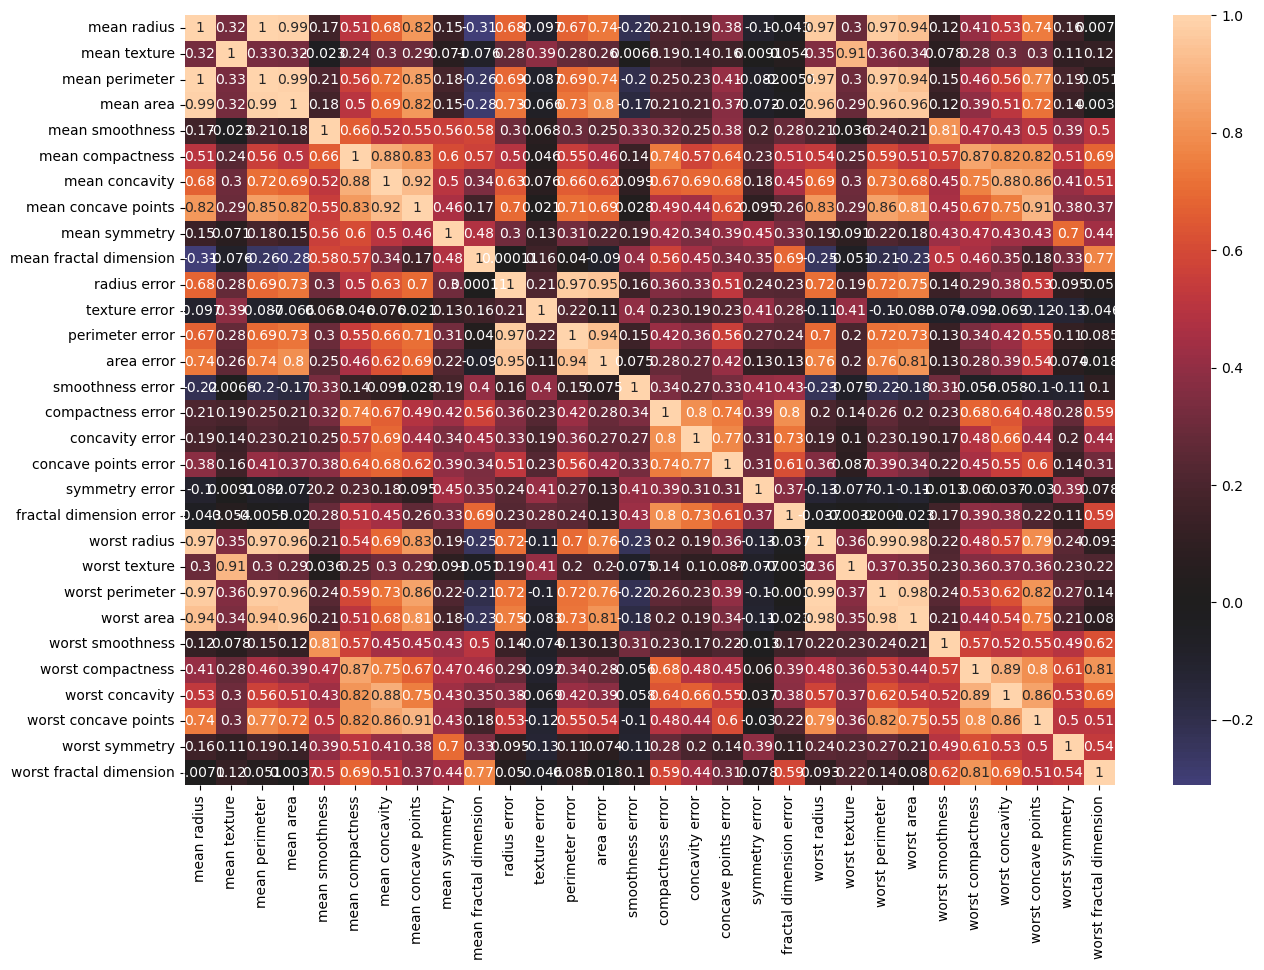

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계에 따른 히트맵 그려보기
plt.figure(figsize=(15, 10))
sns.heatmap(digits_df.corr(), annot=True, center=0)
plt.show()

In [27]:
# 모델에 따른 중요도 내림차순으로 정렬해서 출력해보기
# 가장 무난하고, 점수가 높게 나온 RandomForest를 기준으로 중요도 출력해보기
random_forest = RandomForestClassifier()
X = breast.data # 중요도 판단을 위해 전체 데이터를 사용
y = breast.target
random_forest.fit(X, y)
importance = random_forest.feature_importances_
z = importance.argsort()[::-1] # 중요도 점수 기준으로 내림차순으로 정렬
for i in z:
    print(f"{breast.feature_names[i]}: {importance[i]}")

worst radius: 0.1832067613381281
worst concave points: 0.128996816931072
worst area: 0.11522127422190218
worst perimeter: 0.11480237781322568
mean concave points: 0.09650740674207496
mean area: 0.04510214930736894
mean perimeter: 0.03773318181842866
mean radius: 0.03354671246121531
mean concavity: 0.03182666648544113
worst concavity: 0.023552140566125857
perimeter error: 0.02187005669418177
area error: 0.021850461353263975
mean texture: 0.018852678278691207
worst texture: 0.015515775021616315
worst smoothness: 0.012836688283970724
worst compactness: 0.012223050877280416
worst fractal dimension: 0.01022781803941641
radius error: 0.009774836549623047
worst symmetry: 0.0092828567402186
concavity error: 0.00894415045328898
mean smoothness: 0.008348269248879317
mean compactness: 0.00575446873919457
symmetry error: 0.005441769988753003
texture error: 0.004993541195181251
fractal dimension error: 0.004523160017634991
concave points error: 0.004481151090681192
smoothness error: 0.0044134673220

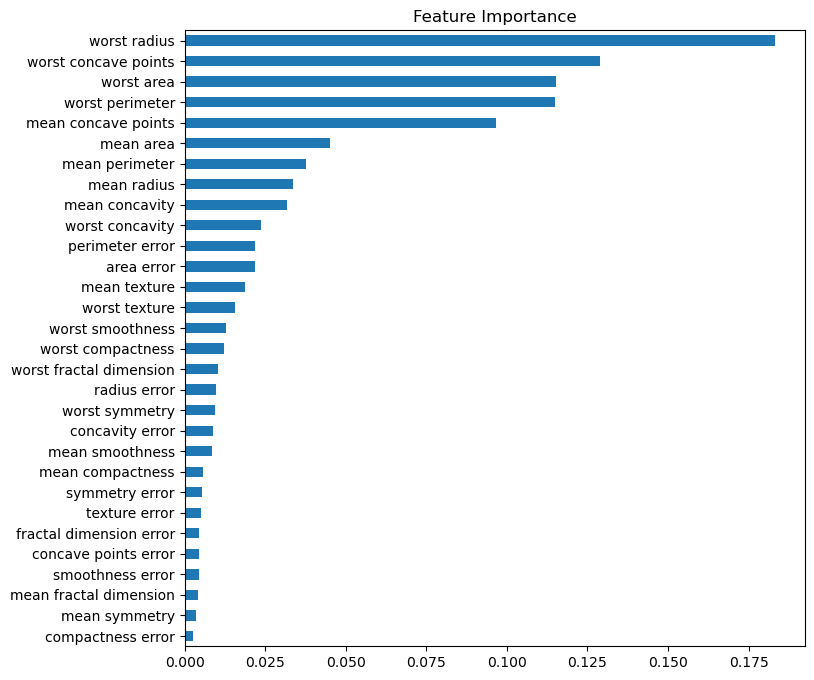

In [28]:
# 출력결과 시각화
feat_import = pd.Series(random_forest.feature_importances_, index=breast.feature_names)
feat_import.sort_values(inplace=True,ascending=False)

ax =feat_import.plot(kind='barh', figsize=(8,8), align='center', title='Feature Importance')
ax.invert_yaxis()

In [29]:
# 하위 10개 수동으로 뺀 후, 새로운 변수에 feature만 저장
digits_df2 = digits_df.drop(['symmetry error','mean fractal dimension','texture error','compactness error','mean symmetry','smoothness error','perimeter error','mean smoothness','fractal dimension error','worst fractal dimension'], axis=1)
digits_df2.shape # 확인작업 30->20

(569, 20)

In [30]:
# 혼동행렬을 사용해서 전체적인 평가해보기
# 전 처리한 데이터와 원본데이터의 혼동행렬 비교해보기
from sklearn.metrics import classification_report

train_input2, test_input2, train_target2, test_target2 = train_test_split(digits_df2, breast.target, test_size=0.15)
random_forest = RandomForestClassifier()
random_forest.fit(train_input2, train_target2)
test_pred6 = random_forest.predict(test_input2)

recall = recall_score(test_target2, test_pred6)
print("재현율 점수:", recall)

print(classification_report(test_target2, test_pred6))

재현율 점수: 0.9482758620689655
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.95      0.95      0.95        58

    accuracy                           0.93        86
   macro avg       0.92      0.92      0.92        86
weighted avg       0.93      0.93      0.93        86



In [31]:
# 원본데이터 다시 출력
random_forest = RandomForestClassifier()
random_forest.fit(train_input, train_target)
test_pred2 = random_forest.predict(test_input)

print(classification_report(test_target, test_pred2))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        31
           1       1.00      0.95      0.97        55

    accuracy                           0.97        86
   macro avg       0.96      0.97      0.96        86
weighted avg       0.97      0.97      0.97        86



- 평가 지표로 삼았던 recall점수는 크게 차이가 없다.
- 30개의 feature들 중에서 필요없는 요소가 있는가 확인해보기 위한 작업이었으나, 확인 및 실험결과는 큰 차이는 없다.
- 애초에 선정되어있는 30개의 feature들이 모두 의미가 있다라고 할수있겠다.

### 회고
---
#### 프로젝트 목표
1. 3가지 데이터셋의 구성을 파악하고, 데이터를 이해하는 과정이 포함되어있는가?	
    - feature와 label 선정을 위한 데이터 분석과정을 전개함
2. 3가지 데이터셋에 대해 각각 5가지 모델을 이용하여 학습을 수행하고 결과값을 얻었는가?	
    - 모델학습 및 테스트가 정상적으로 수행되고, 결과값을 얻었음
3. 3가지 데이터셋에 대해 모델의 평가 지표를 선택하고, 그 이유를 근거를 바탕으로 서술하였는가?	
    - 모델학습을 통해 얻은 결과물을 바탕으로 평가지표를 선택하고, 본인의 의견을 서술하였음

#### 성과 및 결과
1. 공통
    - 함수화 : 반복되는 부분을 간결하게 하기 위하여 작성
        - model fit,predict 부분을 함수화 하여 코드를 간결하게 표현
        - 각각의 평가지표를 짧게 확인할 수 있도록 함수화 하여 표현
2. 손글씨 분류
    + 손 글씨 모델에서는 0의 존재 때문에 정확도는 믿을수 없다. 해서, 정밀도(Precision)와 재현율(Recall)의 종합점수인 f1-score를 사용하여 평가
    + 전체적으로 모델별 f1평가지표가 0.95 이상으로 고루 잘나왔고 의사결정모델의 경우만 0.8 대로 낮게 나왔다
3. 와인 분류
    + 와인분류 문제의 경우, 지정된 3가지의 와인종류 중 하나를 맞추는 문제이므로 단순하게 정확도를 기준으로 모델을 평가
    + 전체 평가지표가 0.9이상으로 잘 나왔고 sgd_model, 로지스틱 회귀의 정확도 값 0.97대로 가장 잘 나왔다.
    - svm_model, sgd_model의 예측 성능이 떨어짐
        - 데이터 스케일링과 하이퍼파라미터 변경 적용해서 예측 성능을 높임
            + svm모델 accuracy, precision, recall, f1
                + 개선 전 : [0.61111, 0.77922, 0.57083, 0.47639]
                + 개선 후 : [0.94444, 0.93333, 0.93333, 0.93333]
            + sgd모델 accuracy, precision, recall, f1
                + 개선전 :  [0.38889, 0.77083, 0.41667 , 0.29206]
                + 개선 후 : [0.94444, 0.93333, 0.93333, 0.93333]
        
4. 유방암 여부 진단
    + 실제 암 환자를 암 환자가 아니라고 분류하는 것이 큰 문제이므로
        + 양성인데 음성으로 판단하는 경우가 작은 recall을 지표로 선정하였다.
    + random_forestd의 recall 결과값이 0.96으로 가장 잘 나왔다.
    + feature의 중요도에 따라 30개-> 20개로 축소하여 모델링 재 진행해봄
        + 각 특성별 heatmap, RandomForest 모델 기준 feature 중요도를 참고하여 중요도가 낮은 컬럼을 제거
        + 평가 지표로 삼았던 recall점수는 크게 차이가 없었다.
    


#### 배운 점
- LogisticRegression 모델 오류
    - max_iter 수치 수정
    - ![Alt text](image.png)
+ svm_model, sgd_model의 예측성능 높이는 방법
    1. 데이터 스케일링 : SVM과 SGD는 데이터의 스케일에 민감 -> StandardScaler나 MinMaxScaler를 이용하여 스케일 진행 추천
    2. 하이퍼파라미터 튜닝 
        + SVM
            + C : 오분류에 대한 패널티 결정
                + 작은값 : 부드러운 결정 경계 / 큰 값 : 복잡한 결정 경계
            + kernel : 데이터를 고차원 공간으로 변환하는 방법 결정
                + linear, poly, rbf, sigmoid 등 옵션이 있음
        + SGB 
            + alpha : 정규화 강도
            + penalty : 사용할 정규화 방법
                + l1,l2,elasticnet
    3. 교차 검증 : GridSearchCV, RandomizedSearchCV
    4. 특성 선택, 추출 : 중요하지 않은 특성 제거, PCA(주성분 분석)으로 특성 추출

#### 개선할 점
+ SVM, SGB 외에도 다른 모델의 하이퍼 파라미터 값을 조정하여 결과치에 어떤 영향을 미치는지 파악해 보면 좋을 것 같다.

#### 결론
+ 각 데이터별로 다양한 분류 모델을 적용하면서 해당 모델의 사용법과 특징을 알 수 있었고, 
+ 예측 결과를 분석하면서 다양한 지표의 특성을 파악하고 배울 수 있어서 좋았다.



